In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])

df


,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [3]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

model=Sequential()
#input dimention=11
model.add(Dense(2,activation="linear",input_dim=2))
model.add(Dense(1,activation="linear"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
new_weight=[
    np.array([[0.1,0.1],[0.1,0.1]],dtype=np.float32),
    np.array([0.,0.],dtype=np.float32),
    np.array([[0.1],[0.1]],dtype=np.float32),
    np.array([0.],dtype=np.float32),
    ]

new_weight

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.1],
        [0.1]], dtype=float32),
 array([0.], dtype=float32)]

In [6]:
model.set_weights(new_weight)
model.get_weights()

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.1],
        [0.1]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
optimizer=keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error',optimizer=optimizer)

history=model.fit(df.iloc[:,0:-1].values,df['lpa'].values,epochs=100,verbose=1,batch_size=1)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8441
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8436
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8326
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8332
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8261
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8248
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8228
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8204
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8193
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8177
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8136
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8112
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

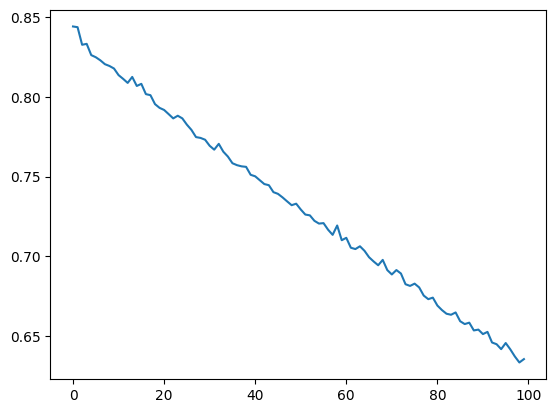

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])